# Introduction

The original data for this notebook can be found on [this website](http://insideairbnb.com/). 

Credits to datacamp.

In [2]:
# import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# configure visualisations

plt.rcParams["figure.figsize"] = [8, 4]
sns.set(style = "darkgrid")

## Read data

Since the file "AB_NYC_2019.csv" has been cleaned up nicely, it does not require any further preprocessing steps before being read into pandas dataframe. The other files in the folder need to be cleaned up before the exploratory data analysis can be performed.

In [3]:
# read data

listings = pd.read_csv("AB_NYC_2019.csv")
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# find the top neighborhoods with listings

by_neighbourhood = listings.groupby("neighbourhood", as_index = False)["id"].count().rename(columns = {"id": "number of bookings"})
top_10 = by_neighbourhood.sort_values(by = "number of bookings", ascending = False).head(10)
top_10

,neighbourhood,number of bookings
214,Williamsburg,3920
13,Bedford-Stuyvesant,3714
94,Harlem,2658
28,Bushwick,2465
202,Upper West Side,1971
95,Hell's Kitchen,1958
64,East Village,1853
201,Upper East Side,1798
51,Crown Heights,1564
127,Midtown,1545


Text(0.5, 1.0, 'Top 10 Neighbourhoods')

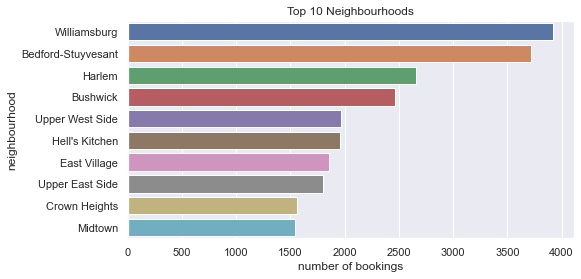

In [6]:
# visualise the data using seaborn

sns.barplot(data = top_10, y = "neighbourhood", x = "number of bookings").set_title("Top 10 Neighbourhoods")

In [11]:
# visualise data as an interactive plot using plotly

fig = px.bar(top_10, x = "number of bookings", y = "neighbourhood", title = "Top 10 Neighbourhood")
fig.show(config = {"displayModeBar": False})